url = https://www.kaggle.com/camnugent/california-housing-prices/code

Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Sambungkan Google Colab ke drive karena data 'California Houses' saya simpan di drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Buka datanya

In [3]:
data = pd.read_csv('/content/drive/My Drive/dataset/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Melihat ukuran data (baris,kolom)

In [4]:
data.shape

(20640, 10)

Melihat informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Melihat statistik data

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Melihat nilai null/kosong

In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dari hasil di atas kita dapatkan bahwa pada kolom total_bedrooms terdapat 207 data null, hal ini bisa kita atasi dengan 4 cara :

1. Drop datanya (hal ini sangat beresiko jika terdapat banyak data null, karena akan mengurangi kebenaran informasi data

2. Replace dengan nilai median (Dapat digunakan meskipun terdapat outliers pada data)

3. Replace dengan nilai modus (Cocok untuk data kategorical)

4. Replace dengan nilai rata-rata (Tidak disarankan jika datanya terdapat outliers)

Mengganti nilai null dengan median

In [9]:
median_tb = data['total_bedrooms'].median()
data['total_bedrooms'].replace(np.nan,median_tb,inplace=True)

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Melihat adanya data yang sama (duplikat)

In [11]:
duplikat = data.duplicated()
print(duplikat.sum())
data[duplikat]

0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


Ternyata tidak adanya duplikasi data / data yang sama

Melihat korelasi data

In [12]:
data.drop('ocean_proximity', axis=1, inplace=True)

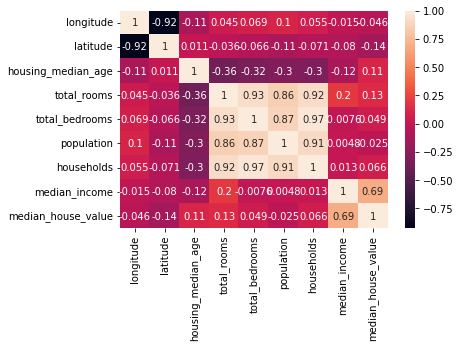

In [13]:
sns.heatmap(data.corr(), annot=True)

Hubungan korelasi yang baik didapatkan antara

1. total_rooms - total_bedrooms = 0.93

2. total_rooms - population = 0.86

3. total_rooms - households = 0.92

4. total_bedrooms - population = 0.87

5. total_bedrooms - households = 0.97

6. households - population = 0.91

Visualisasi hubungan korelasi antara total_rooms - total_bedrooms

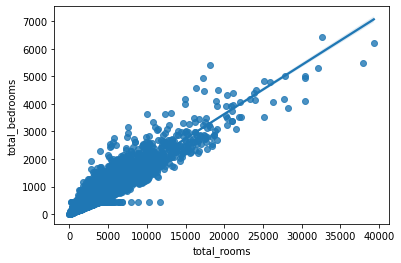

In [14]:
sns.regplot(x='total_rooms', y='total_bedrooms', data=data)

Visualisasi hubungan korelasi antara total_rooms - population

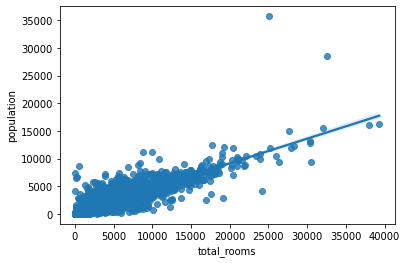

In [15]:
sns.regplot(x='total_rooms', y='population', data=data)

Visualisasi hubungan korelasi antara total_rooms - households

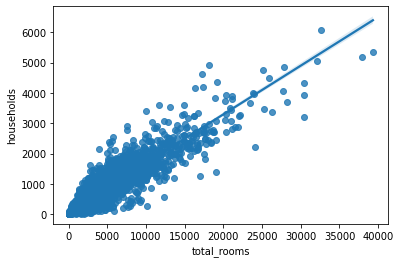

In [16]:
sns.regplot(x='total_rooms', y='households', data=data)

Visualisasi hubungan korelasi antara total_bedrooms - population

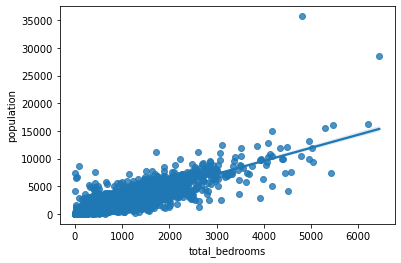

In [17]:
sns.regplot(x='total_bedrooms', y='population', data=data)

Visualisasi hubungan korelasi antara total_bedrooms - households

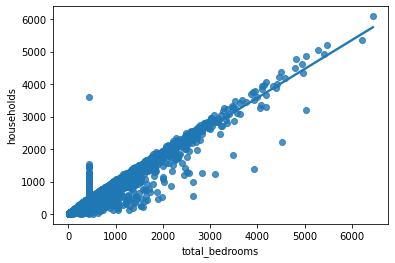

In [18]:
sns.regplot(x='total_bedrooms', y='households', data=data)

Visualisasi hubungan korelasi antara households - population

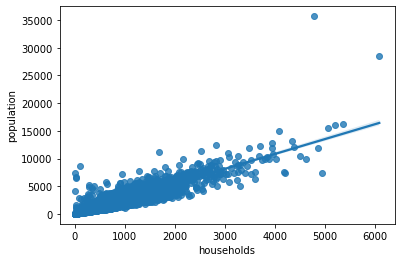

In [19]:
sns.regplot(x='households', y='population', data=data)